<a href="https://colab.research.google.com/github/KoHa2/DeepLearning/blob/main/RabbitCharange/Stage3/2_5_overfiting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Googleドライブのマウント

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [16]:
import sys
sys.path.append('/content/drive/My Drive/E/03.stage3/DNN_code_colab_lesson_1_2')
sys.path.append('/content/drive/My Drive/E/03.stage3/DNN_code_colab_lesson_1_2/lesson_2')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.14
                : 10. 正答率(テスト) = 0.1272
Generation: 20. 正答率(トレーニング) = 0.17666666666666667
                : 20. 正答率(テスト) = 0.1603
Generation: 30. 正答率(トレーニング) = 0.25333333333333335
                : 30. 正答率(テスト) = 0.2003
Generation: 40. 正答率(トレーニング) = 0.3433333333333333
                : 40. 正答率(テスト) = 0.2444
Generation: 50. 正答率(トレーニング) = 0.45666666666666667
                : 50. 正答率(テスト) = 0.3208
Generation: 60. 正答率(トレーニング) = 0.5133333333333333
                : 60. 正答率(テスト) = 0.3663
Generation: 70. 正答率(トレーニング) = 0.5966666666666667
                : 70. 正答率(テスト) = 0.4342
Generation: 80. 正答率(トレーニング) = 0.6333333333333333
                : 80. 正答率(テスト) = 0.4728
Generation: 90. 正答率(トレーニング) = 0.6566666666666666
                : 90. 正答率(テスト) = 0.5026
Generation: 100. 正答率(トレーニング) = 0.6933333333333334
                : 100. 正答率(テスト) = 0.5426
Generation: 110. 正答率(トレーニング) = 0.7166666666666667
                : 110. 正答率(テスト) = 0.5778
Generation: 120. 正

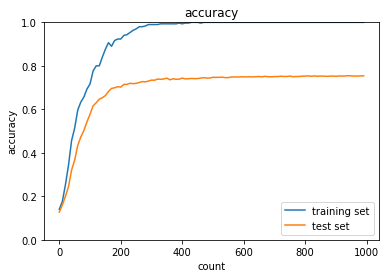

In [17]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.15
                : 10. 正答率(テスト) = 0.1103
Generation: 20. 正答率(トレーニング) = 0.2733333333333333
                : 20. 正答率(テスト) = 0.1801
Generation: 30. 正答率(トレーニング) = 0.4
                : 30. 正答率(テスト) = 0.2476
Generation: 40. 正答率(トレーニング) = 0.45666666666666667
                : 40. 正答率(テスト) = 0.2992
Generation: 50. 正答率(トレーニング) = 0.5433333333333333
                : 50. 正答率(テスト) = 0.3416
Generation: 60. 正答率(トレーニング) = 0.5566666666666666
                : 60. 正答率(テスト) = 0.3631
Generation: 70. 正答率(トレーニング) = 0.5633333333333334
                : 70. 正答率(テスト) = 0.3793
Generation: 80. 正答率(トレーニング) = 0.5866666666666667
                : 80. 正答率(テスト) = 0.4065
Generation: 90. 正答率(トレーニング) = 0.5866666666666667
                : 90. 正答率(テスト) = 0.4334
Generation: 100. 正答率(トレーニング) = 0.5933333333333334
                : 100. 正答率(テスト) = 0.456
Generation: 110. 正答率(トレーニング) = 0.6433333333333333
                : 110. 正答率(テスト) = 0.4794
Generation: 120. 正答率(トレーニング) = 0.64


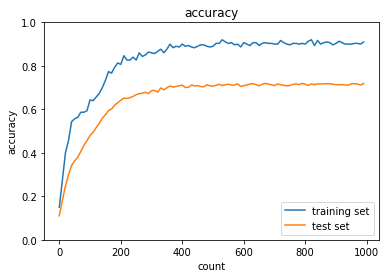

In [18]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.49666666666666665
                : 10. 正答率(テスト) = 0.4131
Generation: 20. 正答率(トレーニング) = 0.7266666666666667
                : 20. 正答率(テスト) = 0.5513
Generation: 30. 正答率(トレーニング) = 0.59
                : 30. 正答率(テスト) = 0.4813
Generation: 40. 正答率(トレーニング) = 0.7133333333333334
                : 40. 正答率(テスト) = 0.5255
Generation: 50. 正答率(トレーニング) = 0.8033333333333333
                : 50. 正答率(テスト) = 0.6388
Generation: 60. 正答率(トレーニング) = 0.8533333333333334
                : 60. 正答率(テスト) = 0.6411
Generation: 70. 正答率(トレーニング) = 0.7
                : 70. 正答率(テスト) = 0.5671
Generation: 80. 正答率(トレーニング) = 0.95
                : 80. 正答率(テスト) = 0.7377
Generation: 90. 正答率(トレーニング) = 0.8166666666666667
                : 90. 正答率(テスト) = 0.6585
Generation: 100. 正答率(トレーニング) = 0.2633333333333333
                : 100. 正答率(テスト) = 0.2556
Generation: 110. 正答率(トレーニング) = 0.9266666666666666
                : 110. 正答率(テスト) = 0.7126
Generation: 120. 正答率(トレーニング) = 0.85
             

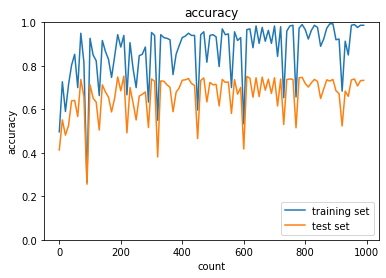

In [19]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

0.1から0.3に変更してみる

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.21
                : 10. 正答率(テスト) = 0.178
Generation: 20. 正答率(トレーニング) = 0.27
                : 20. 正答率(テスト) = 0.2312
Generation: 30. 正答率(トレーニング) = 0.31333333333333335
                : 30. 正答率(テスト) = 0.259
Generation: 40. 正答率(トレーニング) = 0.36
                : 40. 正答率(テスト) = 0.2789
Generation: 50. 正答率(トレーニング) = 0.36333333333333334
                : 50. 正答率(テスト) = 0.2901
Generation: 60. 正答率(トレーニング) = 0.37666666666666665
                : 60. 正答率(テスト) = 0.294
Generation: 70. 正答率(トレーニング) = 0.38666666666666666
                : 70. 正答率(テスト) = 0.296
Generation: 80. 正答率(トレーニング) = 0.42333333333333334
                : 80. 正答率(テスト) = 0.3083
Generation: 90. 正答率(トレーニング) = 0.4166666666666667
                : 90. 正答率(テスト) = 0.3062
Generation: 100. 正答率(トレーニング) = 0.4
                : 100. 正答率(テスト) = 0.3015
Generation: 110. 正答率(トレーニング) = 0.4066666666666667
                : 110. 正答率(テスト) = 0.3044
Generation: 120. 正答率(トレーニング) = 0.4166666666666667
             

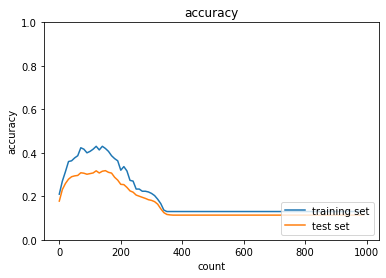

In [20]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.3 #0.1→0.3
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout

In [21]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12666666666666668
                : 10. 正答率(テスト) = 0.1234
Generation: 20. 正答率(トレーニング) = 0.13
                : 20. 正答率(テスト) = 0.1284
Generation: 30. 正答率(トレーニング) = 0.13
                : 30. 正答率(テスト) = 0.1329
Generation: 40. 正答率(トレーニング) = 0.13333333333333333
                : 40. 正答率(テスト) = 0.1376
Generation: 50. 正答率(トレーニング) = 0.14666666666666667
                : 50. 正答率(テスト) = 0.1399
Generation: 60. 正答率(トレーニング) = 0.12
                : 60. 正答率(テスト) = 0.1425
Generation: 70. 正答率(トレーニング) = 0.12
                : 70. 正答率(テスト) = 0.1357
Generation: 80. 正答率(トレーニング) = 0.13
                : 80. 正答率(テスト) = 0.1242
Generation: 90. 正答率(トレーニング) = 0.12666666666666668
                : 90. 正答率(テスト) = 0.1106
Generation: 100. 正答率(トレーニング) = 0.14
                : 100. 正答率(テスト) = 0.1019
Generation: 110. 正答率(トレーニング) = 0.13333333333333333
                : 110. 正答率(テスト) = 0.1104
Generation: 120. 正答率(トレーニング) = 0.13333333333333333
                : 120. 正答率(テスト) = 0

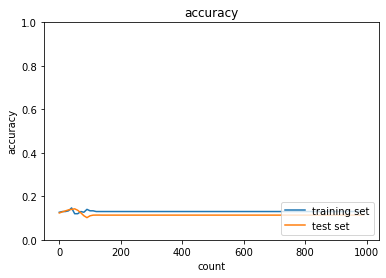

In [22]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.1
                : 10. 正答率(テスト) = 0.1151
Generation: 20. 正答率(トレーニング) = 0.11333333333333333
                : 20. 正答率(テスト) = 0.1133
Generation: 30. 正答率(トレーニング) = 0.14
                : 30. 正答率(テスト) = 0.1358
Generation: 40. 正答率(トレーニング) = 0.15333333333333332
                : 40. 正答率(テスト) = 0.1385
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.114
Generation: 60. 正答率(トレーニング) = 0.13
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.13
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.13
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.13
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.13
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.13
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.13
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.13
                : 13

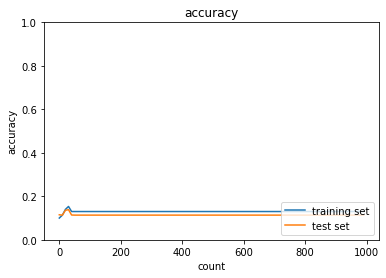

In [23]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.5
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.6433333333333333
                : 10. 正答率(テスト) = 0.5654
Generation: 20. 正答率(トレーニング) = 0.8266666666666667
                : 20. 正答率(テスト) = 0.7023
Generation: 30. 正答率(トレーニング) = 0.9366666666666666
                : 30. 正答率(テスト) = 0.7604
Generation: 40. 正答率(トレーニング) = 0.9433333333333334
                : 40. 正答率(テスト) = 0.7589
Generation: 50. 正答率(トレーニング) = 0.9833333333333333
                : 50. 正答率(テスト) = 0.7898
Generation: 60. 正答率(トレーニング) = 0.9933333333333333
                : 60. 正答率(テスト) = 0.7864
Generation: 70. 正答率(トレーニング) = 0.96
                : 70. 正答率(テスト) = 0.7562
Generation: 80. 正答率(トレーニング) = 0.99
                : 80. 正答率(テスト) = 0.7712
Generation: 90. 正答率(トレーニング) = 0.9933333333333333
                : 90. 正答率(テスト) = 0.7855
Generation: 100. 正答率(トレーニング) = 0.9933333333333333
                : 100. 正答率(テスト) = 0.7861
Generation: 110. 正答率(トレーニング) = 0.9933333333333333
                : 110. 正答率(テスト) = 0.7847
Generation: 120. 正答率(トレーニング) = 0.99

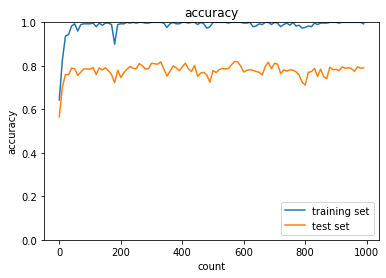

In [26]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.05 #0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.Adam(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11
                : 10. 正答率(テスト) = 0.111
Generation: 20. 正答率(トレーニング) = 0.14666666666666667
                : 20. 正答率(テスト) = 0.1259
Generation: 30. 正答率(トレーニング) = 0.24666666666666667
                : 30. 正答率(テスト) = 0.1762
Generation: 40. 正答率(トレーニング) = 0.2966666666666667
                : 40. 正答率(テスト) = 0.2182
Generation: 50. 正答率(トレーニング) = 0.3433333333333333
                : 50. 正答率(テスト) = 0.2497
Generation: 60. 正答率(トレーニング) = 0.34
                : 60. 正答率(テスト) = 0.2643
Generation: 70. 正答率(トレーニング) = 0.3433333333333333
                : 70. 正答率(テスト) = 0.2755
Generation: 80. 正答率(トレーニング) = 0.35
                : 80. 正答率(テスト) = 0.2997
Generation: 90. 正答率(トレーニング) = 0.3433333333333333
                : 90. 正答率(テスト) = 0.3108
Generation: 100. 正答率(トレーニング) = 0.37
                : 100. 正答率(テスト) = 0.3227
Generation: 110. 正答率(トレーニング) = 0.37666666666666665
                : 110. 正答率(テスト) = 0.3289
Generation: 120. 正答率(トレーニング) = 0.38
                : 120. 正答

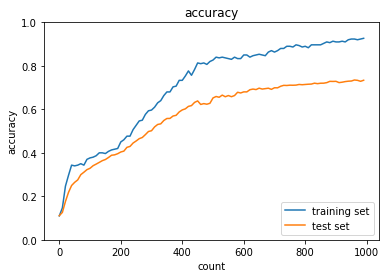

In [25]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()